In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Uniform Pricing

In [2]:
monopoly_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Monopoly - All.dta")
split1_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 1 2 - All.dta")
# split3_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 3 4 - All.dta")
split5_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 5 6 - All.dta")
split7_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 7 8 - All.dta")

In [3]:
vals_data = pd.read_stata(f"..\\data\\Full Model\\Advertiser Valuations.dta")

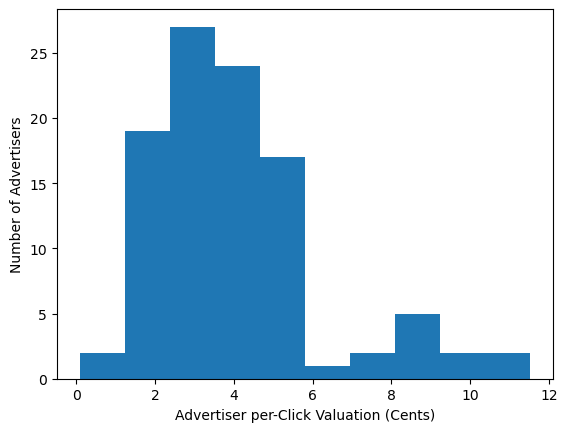

In [80]:
plt.hist(vals_data['advertiser_val_cents'])
plt.xlabel('Advertiser per-Click Valuation (Cents)')
plt.ylabel('Number of Advertisers')
plt.savefig(f"..\\results\\Full Model\\Figures\\Advertiser Valuations.eps", bbox_inches='tight')
plt.show()

In [4]:
monopoly_clicks = pd.DataFrame(monopoly_results.groupby(['ad'])['ctr'].agg('sum'))
monopoly_clicks['advertiser_rank'] = monopoly_clicks.index
monopoly_clicks['ctr'].rename('monopoly_clicks')
split1_clicks = pd.DataFrame(split1_results.groupby(['ad'])['ctr'].agg('sum'))
split1_clicks['advertiser_rank'] = split1_clicks.index
split5_clicks = pd.DataFrame(split5_results.groupby(['ad'])['ctr'].agg('sum'))
split5_clicks['advertiser_rank'] = split5_clicks.index
split7_clicks = pd.DataFrame(split7_results.groupby(['ad'])['ctr'].agg('sum'))
split7_clicks['advertiser_rank'] = split7_clicks.index

In [7]:
joint_data = pd.merge(vals_data, monopoly_clicks, on='advertiser_rank', how='outer')
joint_data.loc[joint_data['ctr'].isna(), 'ctr'] = 0
joint_data['monopoly_welfare'] = joint_data['ctr'] * joint_data['advertiser_val_cents']
joint_data = joint_data.rename(columns={'ctr': 'monopoly_clicks'})


joint_data = pd.merge(joint_data, split1_clicks, on='advertiser_rank', how='outer')
joint_data.loc[joint_data['ctr'].isna(), 'ctr'] = 0
joint_data['split1_welfare'] = joint_data['ctr'] * joint_data['advertiser_val_cents']
joint_data = joint_data.rename(columns={'ctr': 'split1_clicks'})


joint_data = pd.merge(joint_data, split5_clicks, on='advertiser_rank', how='outer')
joint_data.loc[joint_data['ctr'].isna(), 'ctr'] = 0
joint_data['split5_welfare'] = joint_data['ctr'] * joint_data['advertiser_val_cents']
joint_data = joint_data.rename(columns={'ctr': 'split5_clicks'})


joint_data = pd.merge(joint_data, split7_clicks, on='advertiser_rank', how='outer')
joint_data.loc[joint_data['ctr'].isna(), 'ctr'] = 0
joint_data['split7_welfare'] = joint_data['ctr'] * joint_data['advertiser_val_cents']
joint_data = joint_data.rename(columns={'ctr': 'split7_clicks'})

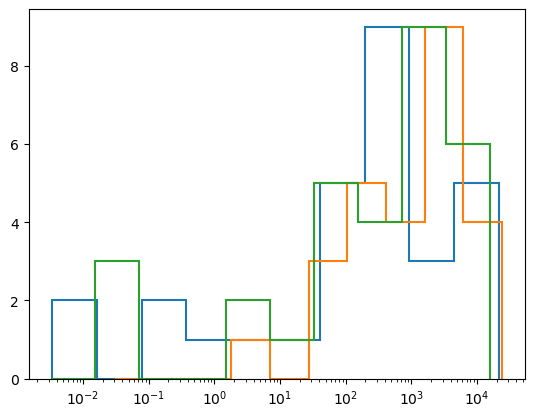

In [8]:
def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins, histtype=u'step', linewidth=1.5)
  plt.xscale('log')


plot_loghist(joint_data.loc[joint_data['monopoly_welfare'] > 0, 'monopoly_welfare'], 10)
plot_loghist(joint_data.loc[joint_data['split1_welfare'] > 0, 'split1_welfare'], 10)
plot_loghist(joint_data.loc[joint_data['split5_welfare'] > 0, 'split5_welfare'], 10)


In [36]:
percentiles = [0.10, 0.25, 0.50, 0.75, 0.9]
# joint_data[['monopoly_welfare', 'split1_welfare', 'split5_welfare', 'split7_welfare']].agg([np.percentile(20)]) / 100 / 100 * 40 / 2 * 365 # too make it annual (in USD)
(joint_data.loc[joint_data['monopoly_clicks'] >0, ['monopoly_clicks', 'split1_clicks', 'split5_clicks', 'split7_clicks']].quantile(percentiles) / np.mean(joint_data.loc[joint_data['monopoly_clicks'] > 0,'monopoly_clicks'])).T

,0.10,0.25,0.50,0.75,0.90
monopoly_clicks,0.000058,0.012832,0.103344,0.777206,3.787921
split1_clicks,0.000000,0.000000,0.041291,1.104286,2.415724
split5_clicks,0.000000,0.000000,0.062899,0.990349,2.138358
split7_clicks,0.000000,0.000000,0.354198,1.293260,2.054065


In [38]:
(joint_data.loc[joint_data['monopoly_clicks'] >0, ['monopoly_clicks', 'split1_clicks', 'split5_clicks', 'split7_clicks']].agg([np.mean, np.std])/ np.mean(joint_data.loc[joint_data['monopoly_clicks'] > 0,'monopoly_clicks'])).T

,mean,std
monopoly_clicks,1.000000,1.836637
split1_clicks,0.810403,1.190313
split5_clicks,0.737932,1.280351
split7_clicks,0.752207,1.027992


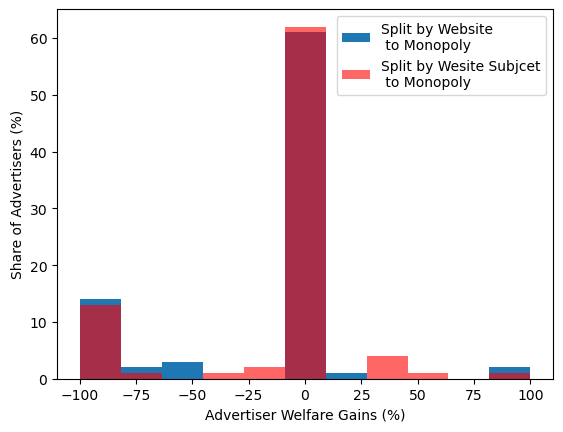

In [15]:
plt.hist((joint_data['monopoly_clicks'] - joint_data['split1_clicks']) / (joint_data['split1_clicks'] + 1e-6) * 100, alpha=1, range= [-100, 100], bins=11)
plt.hist((joint_data['monopoly_clicks'] - joint_data['split5_clicks']) / (joint_data['split5_clicks'] + 1e-6) * 100, alpha=0.6, range= [-100, 100], bins=11, color='red')
np.mean(joint_data['monopoly_clicks'] - joint_data['split1_clicks']/ (joint_data['split1_clicks'] + 1e-6) * 100)

plt.xlabel('Advertiser Welfare Gains (%)')
plt.ylabel('Share of Advertisers (%)')
labels = ['Split by Website\n to Monopoly', 'Split by Wesite Subjcet\n to Monopoly']
# plt.title('Estimated Click Rates Distribution for Top 10 Ads')

plt.legend(labels)
# plt.grid(True)

# Under Non-Uniform Pricing

In [18]:
monopoly_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Monopoly Revenue Max - All.dta")
split1_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 1 2 Revenue Max - All.dta")
# split3_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 3 4 - All.dta")
split5_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 5 6 Revenue Max - All.dta")
split7_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 7 8 Revenue Max - All.dta")

In [24]:
monopoly_clicks = pd.DataFrame(monopoly_results.groupby(['ad'])[['ctr', 'rev']].agg('sum'))
monopoly_clicks['advertiser_rank'] = monopoly_clicks.index
split1_clicks = pd.DataFrame(split1_results.groupby(['ad'])[['ctr', 'rev']].agg('sum'))
split1_clicks['advertiser_rank'] = split1_clicks.index
split5_clicks = pd.DataFrame(split5_results.groupby(['ad'])[['ctr', 'rev']].agg('sum'))
split5_clicks['advertiser_rank'] = split5_clicks.index
split7_clicks = pd.DataFrame(split7_results.groupby(['ad'])[['ctr', 'rev']].agg('sum'))
split7_clicks['advertiser_rank'] = split7_clicks.index

In [25]:
monopoly_clicks = monopoly_clicks.rename(columns={'ctr': 'monopoly_clicks', 'rev': 'monopoly_welfare'})
split1_clicks = split1_clicks.rename(columns={'ctr': 'split1_clicks', 'rev': 'split1_welfare'})
split5_clicks = split5_clicks.rename(columns={'ctr': 'split5_clicks', 'rev': 'split5_welfare'})
split7_clicks = split7_clicks.rename(columns={'ctr': 'split7_clicks', 'rev': 'split7_welfare'})


In [34]:
joint_data = pd.merge(monopoly_clicks, split1_clicks, on='advertiser_rank', how='outer')
joint_data = pd.merge(joint_data, split5_clicks, on='advertiser_rank', how='outer')
joint_data = pd.merge(joint_data, split7_clicks, on='advertiser_rank', how='outer')

for var in joint_data.columns:
    joint_data.loc[joint_data[var].isna(), var] = 0

In [38]:
percentiles = [0.10, 0.25, 0.50, 0.75, 0.9]
# joint_data[['monopoly_welfare', 'split1_welfare', 'split5_welfare', 'split7_welfare']].agg([np.percentile(20)]) / 100 / 100 * 40 / 2 * 365 # too make it annual (in USD)
table_1 = (joint_data.loc[joint_data['monopoly_welfare'] > 0, ['monopoly_welfare', 'split1_welfare', 'split5_welfare', 'split7_welfare']].quantile(percentiles) / np.mean(joint_data.loc[joint_data['monopoly_welfare'] > 0,'monopoly_welfare'])).T


In [39]:
table_2 = (joint_data[['monopoly_welfare', 'split1_welfare', 'split5_welfare', 'split7_welfare']].agg([np.mean, np.std]) / np.mean(joint_data['monopoly_welfare'])).T
table_1 = pd.merge

In [45]:
table_2.merge(table_1, left_index=True, right_index=True)

,mean,std,0.1,0.25,0.5,0.75,0.9
monopoly_welfare,1.000000,2.378804,1.146392e-04,0.004985,0.093173,0.966330,3.145911
split1_welfare,0.958475,2.340884,0.000000e+00,0.000529,0.087224,0.605751,2.747705
split5_welfare,0.953184,2.279751,2.295667e-07,0.007509,0.041034,0.986645,2.830409
split7_welfare,0.957158,2.230402,0.000000e+00,0.004847,0.085279,0.565441,3.516042
